Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import geopandas as gpd
import plotly.express as px
import folium
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import het_breuschpagan 



CSV File 

In [ ]:
#do not run, this code has been updates. The final data set is now /Users/mona/final-project-monabr4/data/final_covid_data.csv

state_covid_data = pd.read_csv('/Users/mona/final-project-monabr4/data/raw/state_covid_data.csv')
population= pd.read_csv('/Users/mona/final-project-monabr4/data/raw/exported_statis_csv_shapefile/cleaned_population_data.csv')
merged_data = pd.merge(population, state_covid_data, left_on='stateName', right_on='state')
merged_data.drop(columns=['state'], inplace=True)
merged_data

Basic Exploratory Analysis 

In [2]:
csv_file_path = "/Users/mona/final-project-monabr4/data/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)
(final_covid_data)
dimensions = final_covid_data.shape
print("Dimensions of the DataFrame:", dimensions)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mona/final-project-monabr4/data/final_covid_data.csv'

In [ ]:
csv_file_path = "/Users/mona/final-project-monabr4/data/final_covid_data.csv"
final_covid_data = pd.read_csv(csv_file_path)

columns_to_sum = [
    'cases_new', 'cases_recovered', 'cases_active',
    'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly',
    'population', 'cases_new_per_capita', 'cases_recovered_per_capita', 'cases_active_per_capita'
]
sum_by_state = final_covid_data.groupby('state')[columns_to_sum].sum()


sum_by_state


In [ ]:
subset_sum_by_state = sum_by_state.iloc[:, [3, 4, 5,6]] 
subset_sum_by_state

In [ ]:
subset_sum_by_state = sum_by_state.iloc[:, [0, 1, 2]] 
subset_sum_by_state

In [ ]:
subset_sum_by_state = sum_by_state.iloc[:, [8]]  
subset_sum_by_state

CHOOSE 1 of the THREE DOWN THERE PLEASE

How does the distribution of COVID-19 cases across different age groups vary among states in Malaysia?

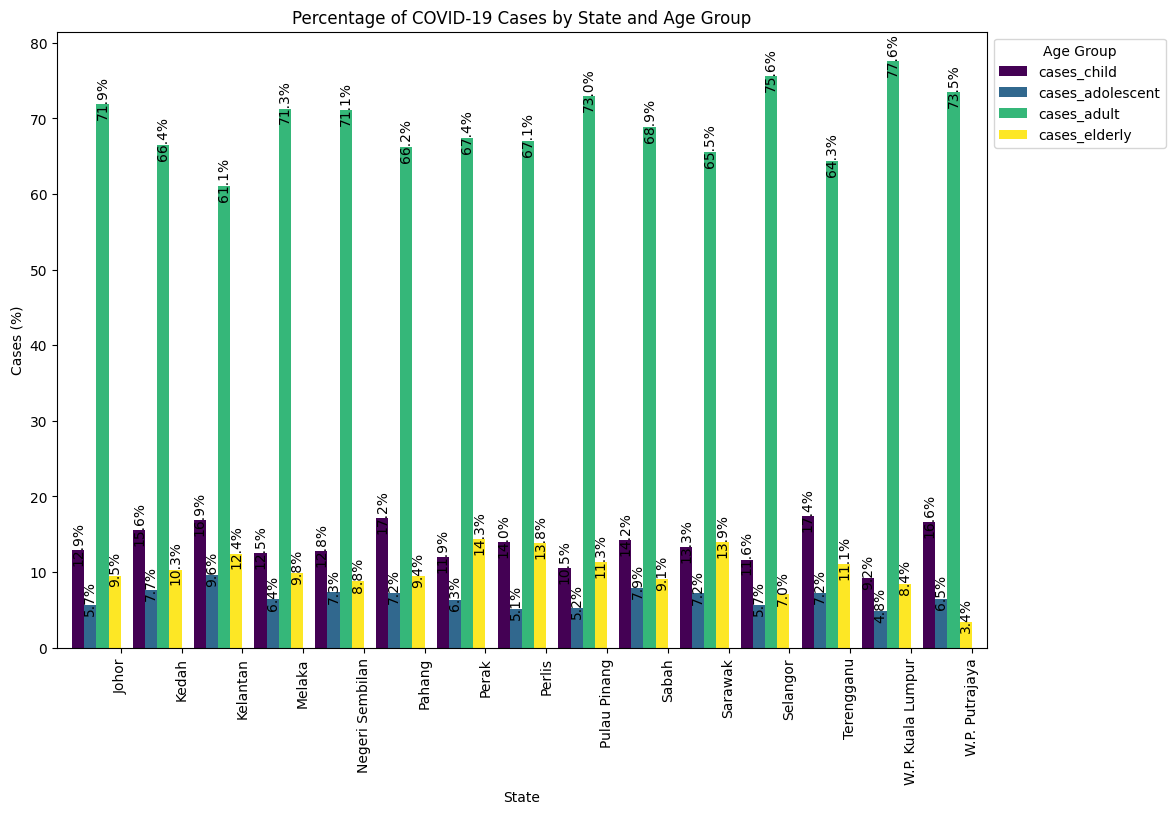

In [34]:
selected_columns = ['state', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
selected_df = final_covid_data[selected_columns]
total_by_state = selected_df.groupby('state').sum()

total_by_state_percentage = total_by_state.div(total_by_state.sum(axis=1), axis=0) * 100


ax = total_by_state_percentage.plot(kind='bar', figsize=(12, 8), width=0.8, position=1, colormap='viridis', stacked=False)

plt.title('Percentage of COVID-19 Cases by State and Age Group')
plt.xlabel('State')
plt.ylabel('Cases (%)')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2., y + height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', rotation=90)

plt.show()


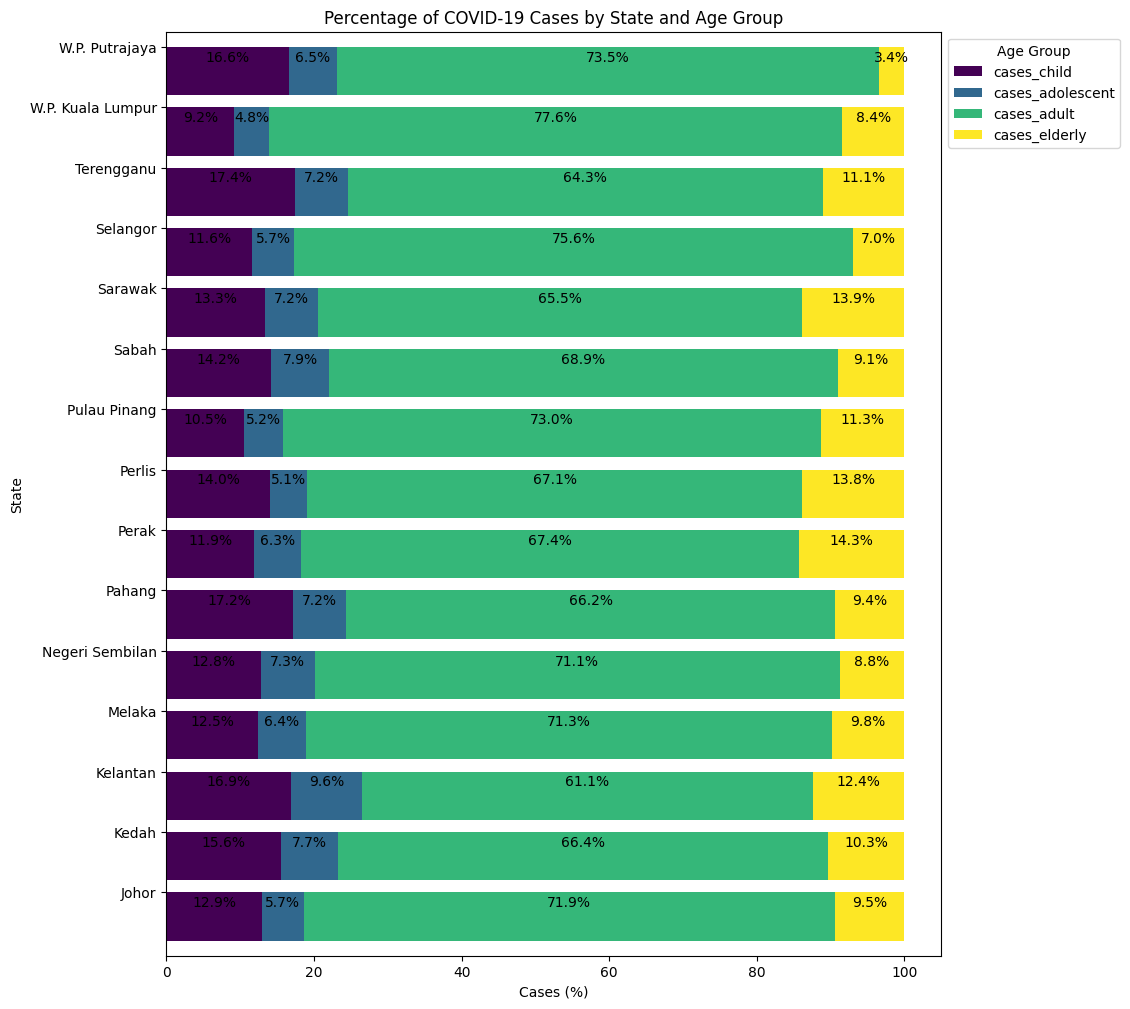

In [35]:
selected_columns = ['state', 'cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
selected_df = final_covid_data[selected_columns]
total_by_state = selected_df.groupby('state').sum()


total_by_state_percentage = total_by_state.div(total_by_state.sum(axis=1), axis=0) * 100


ax = total_by_state_percentage.plot(kind='barh', figsize=(10, 12), width=0.8, position=1, colormap='viridis', stacked=True)

plt.title('Percentage of COVID-19 Cases by State and Age Group')
plt.xlabel('Cases (%)')
plt.ylabel('State')
plt.legend(title='Age Group', loc='upper left', bbox_to_anchor=(1, 1))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2., y + height / 2.),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()




GRAPHING USING THE SHAPEFILE

How do COVID-19 incidence rates vary across different states in Malaysia?: Interactive Plot of New Covid Cases Over Time 

In [ ]:
geojson_file = "/Users/mona/final-project-monabr4/data/final_malaysia_shapefile_data.geojson"
gdf = gpd.read_file(geojson_file)


df = state_covid_data[['Date', 'state', 'cases_new']]
df['Date'] = pd.to_datetime(df['Date'])
grouped_data = df.groupby(['Date', 'state']).sum().reset_index()
fig = px.line(grouped_data, x='Date', y='cases_new', color='state',
              title='COVID-19 Cases Over Time for Each State',
              labels={'cases_new': 'New Cases', 'Date': 'Date'},
              line_group='state')

fig.write_html("/Users/mona/final-project-monabr4/results/interactive_new_cases_by_state.html")


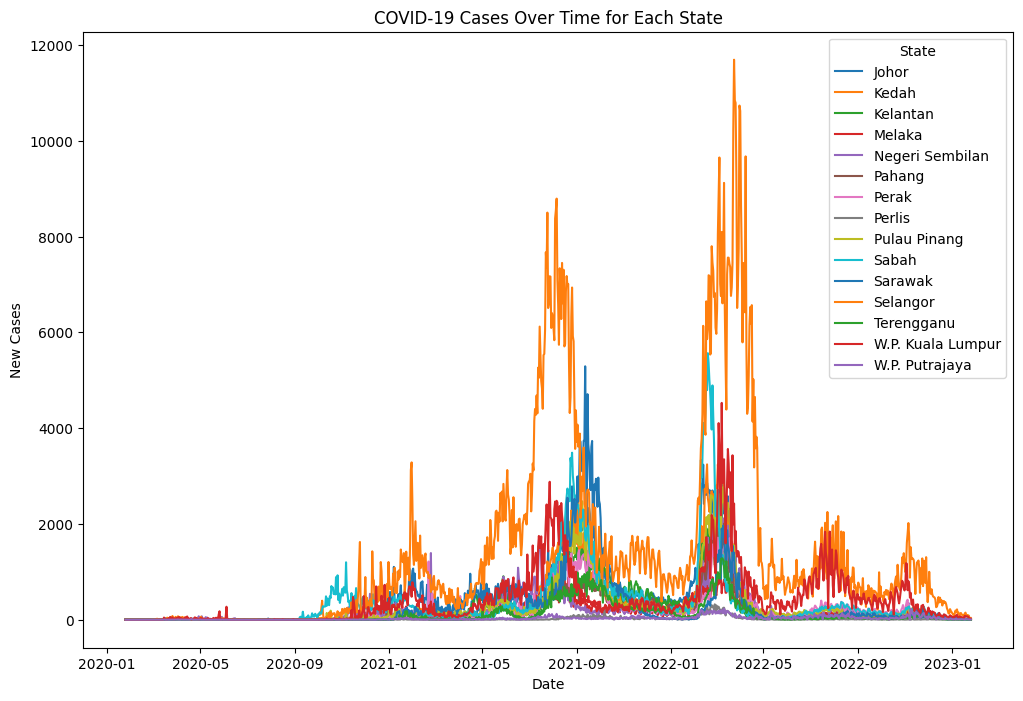

In [36]:
final_covid_data['Date'] = pd.to_datetime(final_covid_data['Date'])
grouped_data = final_covid_data.groupby(['Date', 'state']).sum().reset_index()
plt.figure(figsize=(12, 8))

for state in grouped_data['state'].unique():
    state_data = grouped_data[grouped_data['state'] == state]
    plt.plot(state_data['Date'], state_data['cases_new'], label=state)


plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('COVID-19 Cases Over Time for Each State')

plt.legend(title='State')
plt.savefig("/Users/mona/final-project-monabr4/results/static_new_cases_by_state.png")
plt.show()



Are there significant disparities in the impact of the pandemic on various regions in terms of cases and recoveries?

In [ ]:
selected_columns = ['state', 'cases_new', 'cases_recovered']
data_to_plot = final_covid_data[selected_columns]

total_by_state = data_to_plot.groupby('state').sum()


total_by_state['percent_recovered'] = (total_by_state['cases_recovered'] / total_by_state['cases_new']) * 100


num_states = len(total_by_state.index)
num_cols = 2  


num_rows = -(-num_states // num_cols)  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, state in enumerate(total_by_state.index):
    state_data = [total_by_state.loc[state]['percent_recovered'], 100 - total_by_state.loc[state]['percent_recovered']]
    wedges, texts, autotexts = axes[i].pie(state_data, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#66b3ff'])


    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    axes[i].set_title(f'Distribution of COVID-19 Cases in {state}')


    axes[i].legend(wedges, ['Recovered', 'Did Not Recover'], title='Outcome', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))


plt.tight_layout()
plt.show()





Is there a correlation between population density in different states and the rate of COVID-19 transmission?

In [ ]:
selected_columns = ['state', 'population', 'cases_new_per_capita']
data_to_plot = final_covid_data[selected_columns]

mean_data = data_to_plot.groupby('state').mean()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('viridis', len(mean_data))

for i, (state, row) in enumerate(mean_data.iterrows()):
    color = palette[i]
    plt.scatter(row['population'], row['cases_new_per_capita'], color=color, marker='o', label=state)

plt.title('Population Density vs. COVID-19 Transmission Rate by State')
plt.xlabel('Population Density')
plt.ylabel('COVID-19 Transmission Rate (Cases per Capita)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


correlation_coefficient, _ = pearsonr(mean_data['population'], mean_data['cases_new_per_capita'])
print(f"Pearson correlation coefficient: {correlation_coefficient}")

plt.show()


In [ ]:
#still working on the last map --- do not run, will make computer slow 

file_path = "/Users/mona/final-project-monabr4/data/final_malaysia_shapefile_data.geojson"
gdf = gpd.read_file(file_path)


m = folium.Map(location=[3.1390, 101.6869], zoom_start=6)


for _, row in gdf.iterrows():
    state_name = row['state']
    style_function = lambda x: {'color': 'black', 'weight': 1, 'fillColor': 'lightgray', 'fillOpacity': 0.7}
    folium.GeoJson(row['geometry'], name=state_name, popup=state_name, style_function=style_function).add_to(m)


    centroid = row['geometry'].centroid
    folium.Marker(location=[centroid.y, centroid.x], popup=state_name, icon=None).add_to(m)


folium.LayerControl().add_to(m)


m


Statistics on cases_new_per_capita vs overall populaiton for each state 

In [51]:

#homesceda





Shapiro-Wilk Test for Normality:
Test Statistic: 0.8864492774009705
P-value: 0.05927490070462227


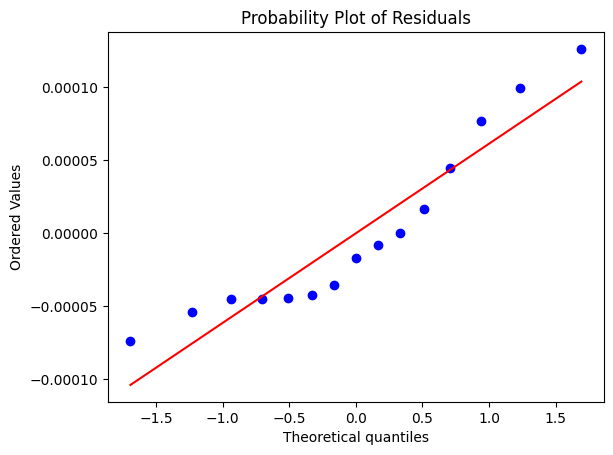

In [52]:
#linearity 
residuals = mean_data['cases_new_per_capita'] - (intercept + slope * mean_data['population'])

statistic, p_value_shapiro = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value_shapiro}")

probplot(residuals, plot=plt)
plt.title('Probability Plot of Residuals')
plt.show()


Spearman's Correlation Results:
Spearman's Correlation Coefficient: -0.2071428571428571
P-value: 0.4588428049634703
The relationship is not statistically significant.


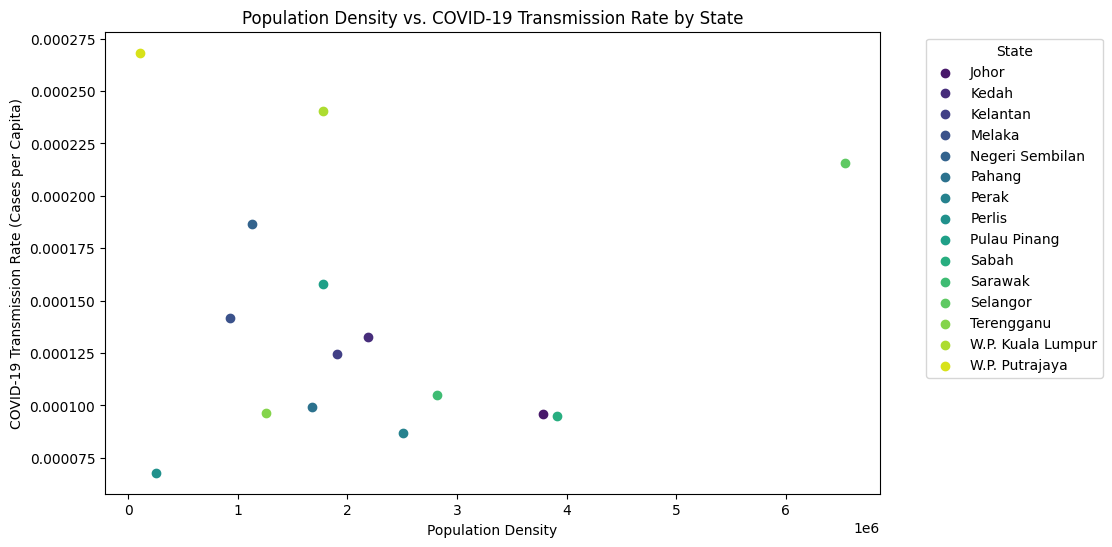

In [49]:
# if the asssumptions have not been met 
selected_columns = ['state', 'population', 'cases_new_per_capita']
data_to_plot = final_covid_data[selected_columns]

mean_data = data_to_plot.groupby('state').mean()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('viridis', len(mean_data))

for i, (state, row) in enumerate(mean_data.iterrows()):
    color = palette[i]
    plt.scatter(row['population'], row['cases_new_per_capita'], color=color, marker='o', label=state)

plt.title('Population Density vs. COVID-19 Transmission Rate by State')
plt.xlabel('Population Density')
plt.ylabel('COVID-19 Transmission Rate (Cases per Capita)')

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')


spearman_corr, p_value_spearman = spearmanr(mean_data['population'], mean_data['cases_new_per_capita'])
print(f"Spearman's Correlation Results:")
print(f"Spearman's Correlation Coefficient: {spearman_corr}")
print(f"P-value: {p_value_spearman}")


if p_value_spearman < 0.05:
    print("The relationship is statistically significant.")
else:
    print("The relationship is not statistically significant.")

plt.show()
